# Breast Cancer Classification

Description of each of the 10 parameters of the  cell nuclei: 

In [4]:
# radius           : radius of an individual nucleus. It is measured by averaging length of the radial line segments
# texture          : measured by finding the variance of grey scale intensities in the component pixels
# perimeter        : total distance between the snake points 
# area             : measured by counting the number of pixels on the interior of the snake and adding one half of pixels in the perimeter
# smoothness       : calculated by measuring the difference between length of a radial line and mean length of lines surrounding it
# compactness      : given by combining perimeter and area of cell nuclei by using formula (perimeter)^2/area
# concavity        : measure of number and severity of concavities or indentations in a cell nucleus.      
# concave points   : measures the number rather than magnitude of contour concavities 
# symmetry         : measured by calculating length differences between lines perpendicular to major axis or longest hord through center to the cell boundary in both directions
# fractal dimension: is calculated using the coastline approximation by calculating “coastline approximation” - 1

# Maximum value of a parameter is useful since only a few malignant cells may occur in a given sample.
# Mean value of a parameter is useful so as to get an average value of a parameter for further calculations.
# Standard error of a parameter is useful to know the deviation from the actual value of a parameter.


Initialise libraries:

In [200]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import sys 
import numpy as np
import sklearn
from math import sqrt

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm, datasets
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
    
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams

Load the data set:

In [201]:
df_ = load_breast_cancer()

#convert dataset to pandas dataframe
df = pd.DataFrame(df_.data, columns = df_.feature_names)

df['Diagnosis'] = df_.target

X = df.drop(['Diagnosis'], axis=1)       #data 
y = df["Diagnosis"].copy()               #label

In [202]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [204]:
# number of unique values in every column
df.nunique()

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
Diagnosis                    2
dtype: int64

In [205]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [206]:
diag_n = df[df['Diagnosis'] == 0] #belign
diag_y = df[df['Diagnosis'] == 1] #malignant

In [207]:
diag_n

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


In [208]:
diag_y

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


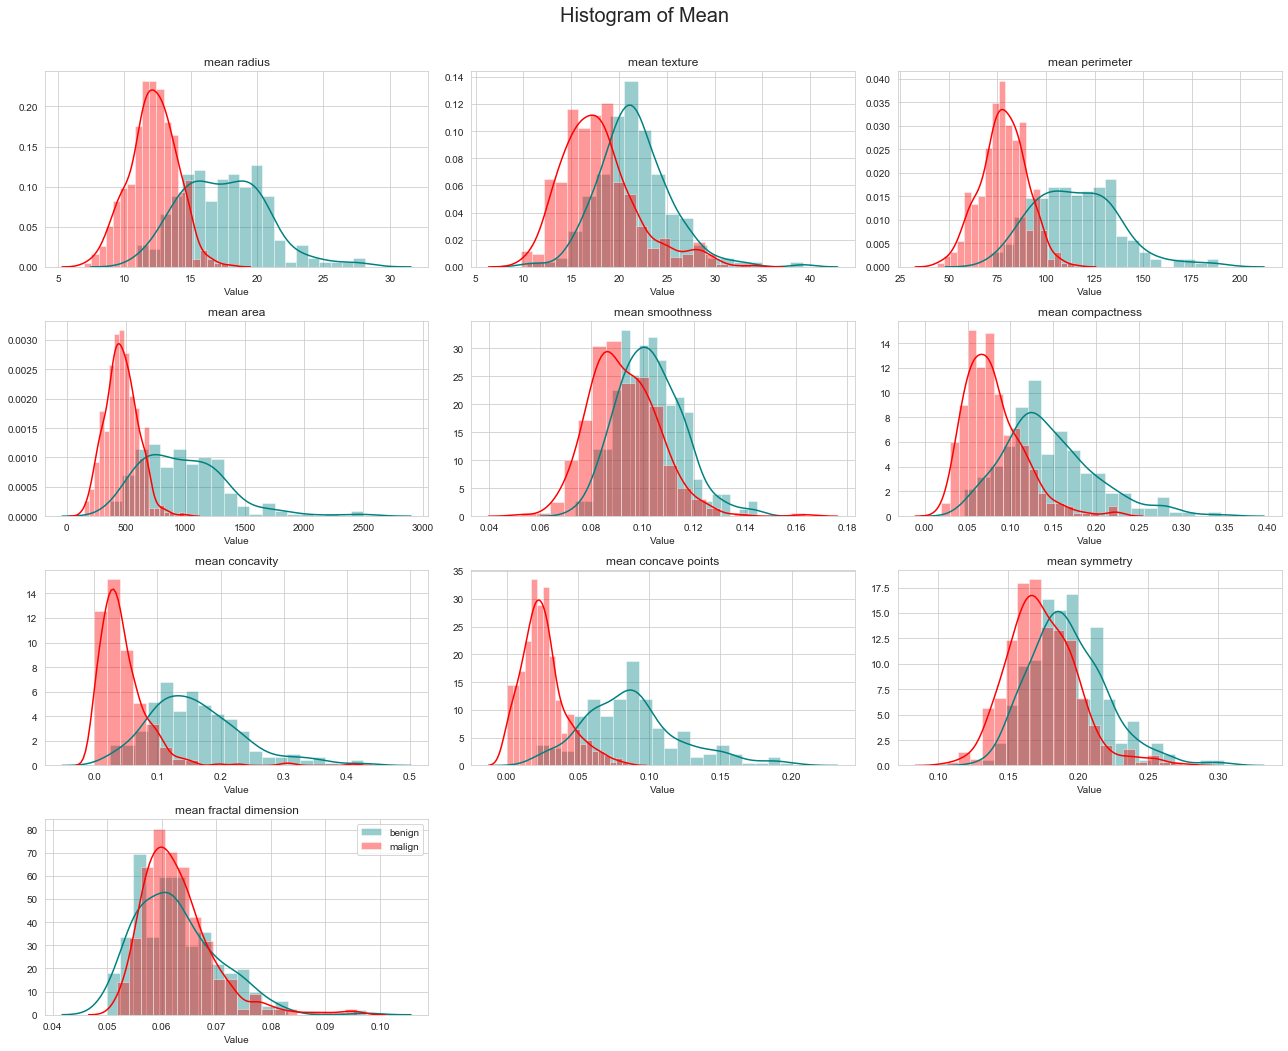

In [209]:
#plotting histograms 

fig = plt.figure(figsize = (18,14),tight_layout=True)

for i,b in enumerate(list(df.columns[0:10])):
    
    # Enumerate starting at 0, add 1 for subplotting
    i = i + 1
    
    # Create axes object 
    ax = fig.add_subplot(4,3,i)
   
    # Plot  histogram using seaborn
    sns.distplot( diag_n[b],label = 'benign', color = "teal", bins = 20,hist = True)
    sns.distplot( diag_y[b],label = 'malign', color = 'r', bins = 20,hist = True )
    
    ax.set_xlabel('Value')    
    ax.set_title(b)

plt.suptitle('Histogram of Mean', y=1.04, size=20)
plt.tight_layout()
plt.legend()
plt.show()

 There seems to be a good seperation mean concave points,mean concavity

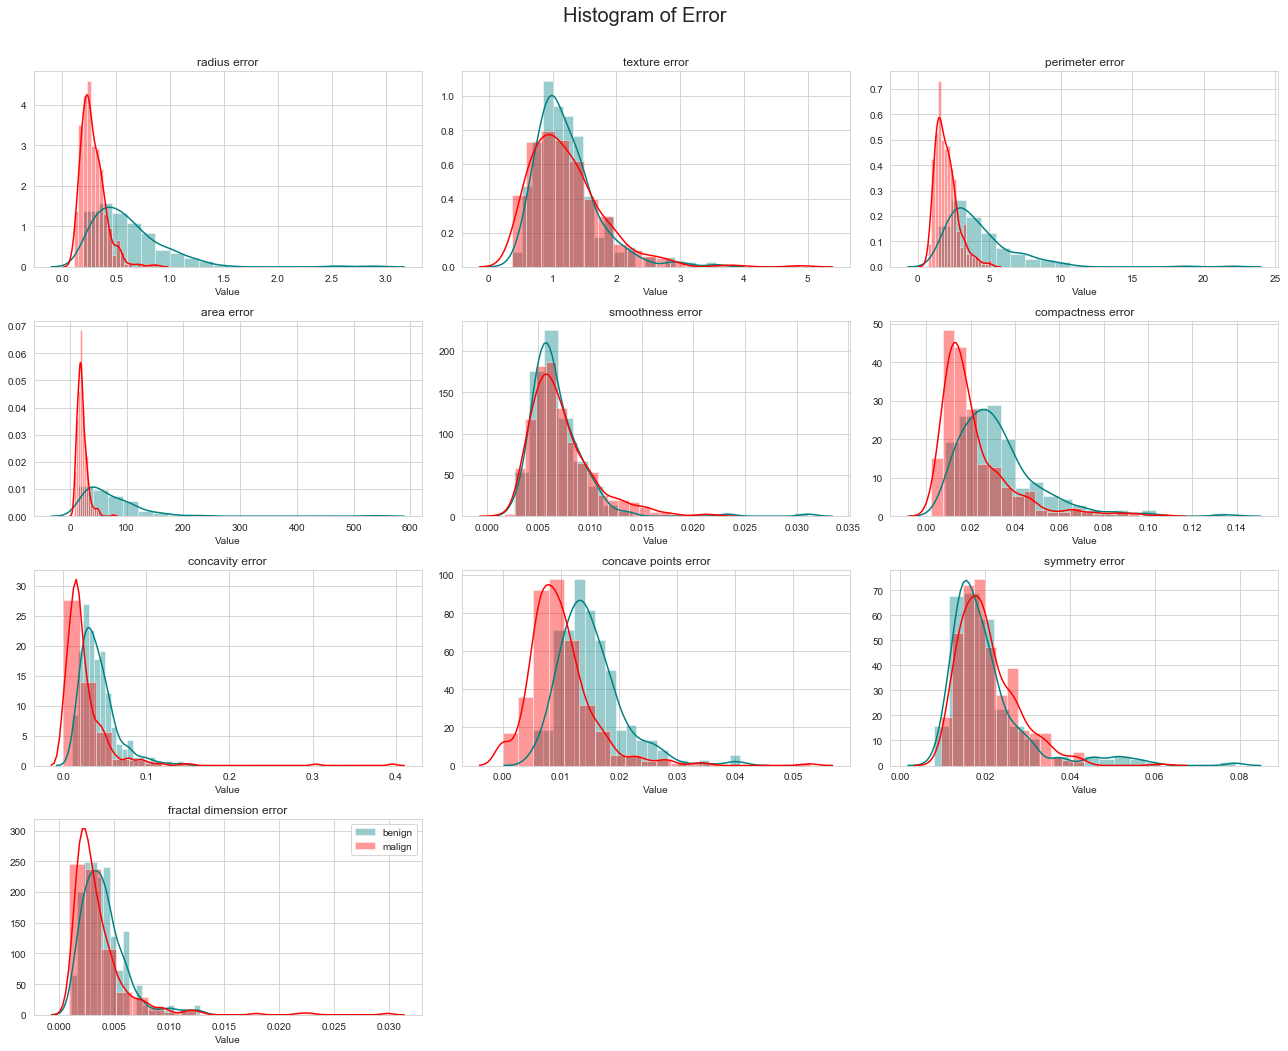

In [210]:
fig = plt.figure(figsize = (18,14))

for i,b in enumerate(list(df.columns[10:20])):
    
    # Enumerate starting at 0, add 1 for subplotting
    i = i + 1
    
    # Create axes object 
    ax = fig.add_subplot(4,3,i)
   
    # Plot  histogram using seaborn
    sns.distplot( diag_n[b],label = 'benign', color = "teal", bins = 20,hist = True)
    sns.distplot( diag_y[b],label = 'malign', color = 'r', bins = 20,hist = True )
    
    ax.set_xlabel('Value')    
    ax.set_title(b)

plt.suptitle('Histogram of Error', y=1.04, size=20)
plt.tight_layout()
plt.legend()
plt.show()

The best seperation is between area error

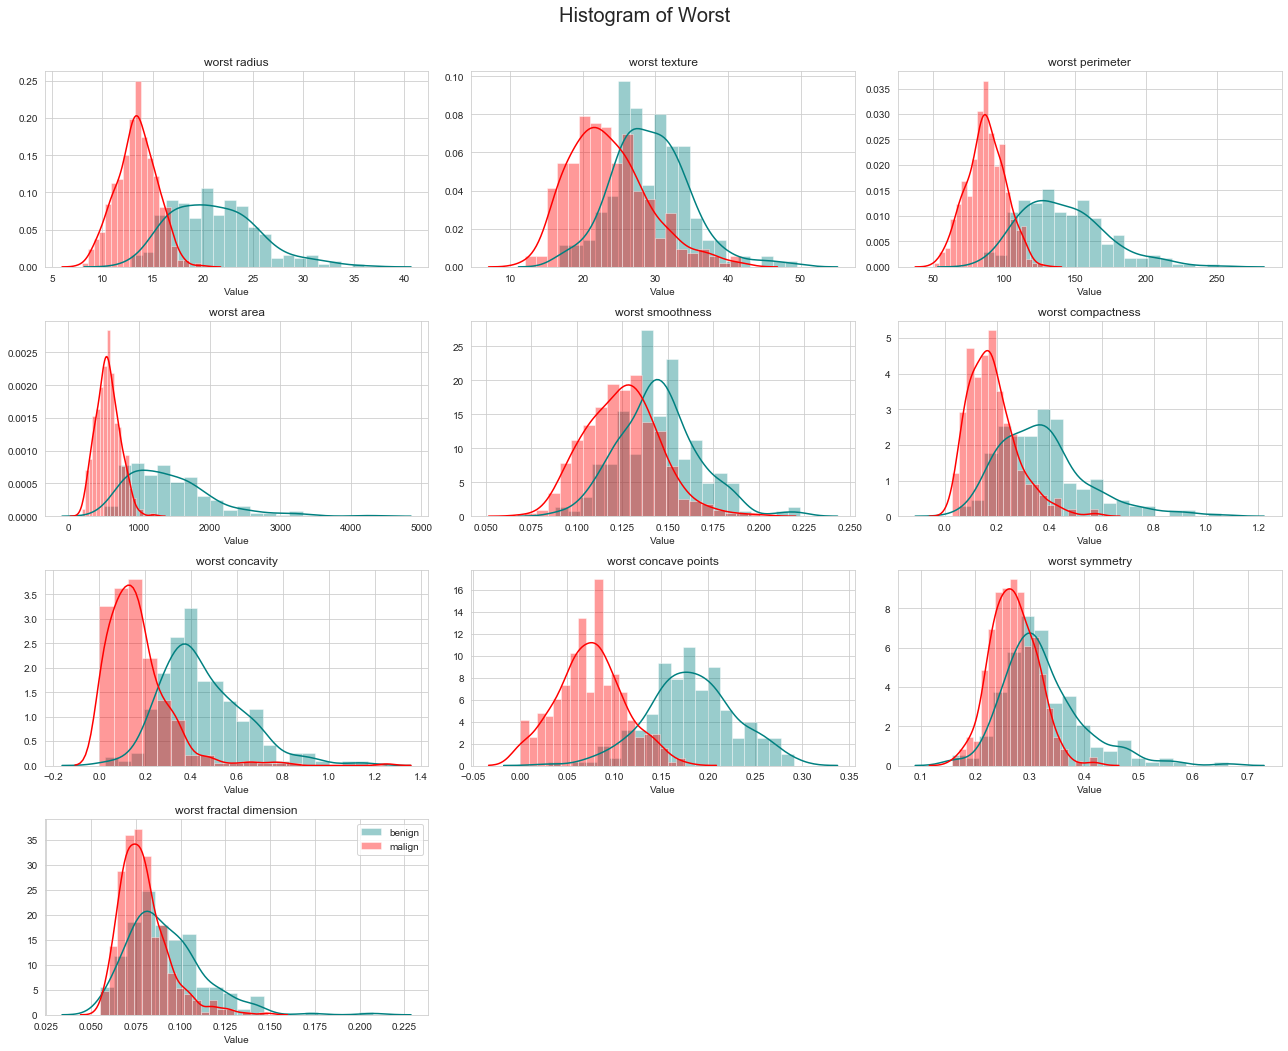

In [211]:
fig = plt.figure(figsize = (18,14))

for i,b in enumerate(list(df.columns[20:30])):  
    
    # Enumerate starting at 0,add 1 for subplotting
    i = i + 1
    
    # Create axes object 
    ax = fig.add_subplot(4,3,i)
   
    # Plot  histogram using seaborn
    sns.distplot( diag_n[b],label = 'benign', color = "teal", bins = 20,hist = True)
    sns.distplot( diag_y[b],label = 'malign', color = 'r', bins = 20,hist = True )
    
    ax.set_xlabel('Value')    
    ax.set_title(b)
    
plt.suptitle('Histogram of Worst', y=1.04, size=20)
plt.tight_layout()
plt.legend()
plt.show()

There seems to be a good seperation between worst radius,worst area,worst perimeter when compared to rest

- Based on all histograms only,
the top five candidates can be mean concave points,area error,worst radius,worst area,worst perimeter

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

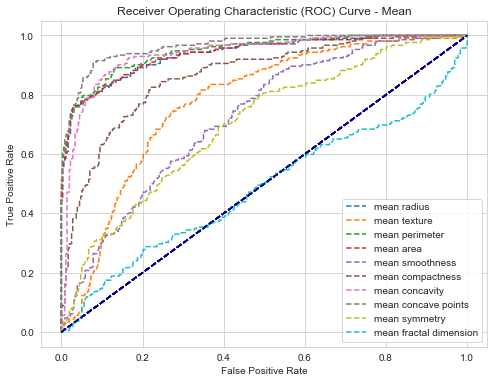

In [213]:
# Plot receiver-operating-characteristic (ROC) curves with one figure for each of the groups of 10

fig = plt.figure(figsize = (8,6))

for i,b in enumerate(list(df.columns[0:10])):
    
    tpr,fpr,_ = metrics.roc_curve(df["Diagnosis"],df[b],pos_label= None) #true labels, y_score
        
    plt.plot(fpr,tpr, linestyle='--', label=b)    
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    
    plt.title('Receiver Operating Characteristic (ROC) Curve - Mean')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
plt.show()

Mean concave point,mean concavity is situated most on the top left corner and thus has the highest area under the curve

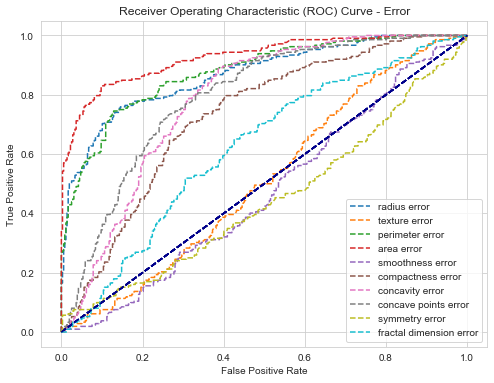

In [214]:
fig = plt.figure(figsize = (8,6))

for i,b in enumerate(list(df.columns[10:20])):
    
    tpr,fpr,_ = metrics.roc_curve(df["Diagnosis"],df[b],pos_label= None) #true labels, y_score
        
    plt.plot(fpr,tpr, linestyle='--', label=b)    
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    
    plt.title('Receiver Operating Characteristic (ROC) Curve - Error')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
plt.show()

For errors,area error is situated most on the top left corner and thus has the highest area under the curve

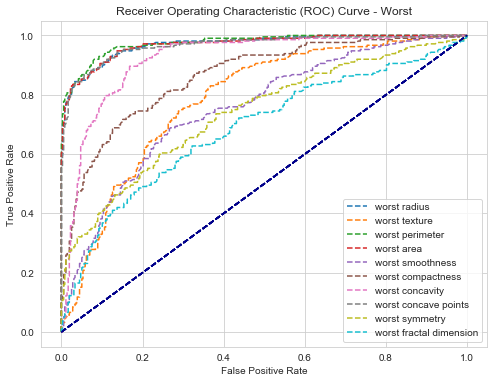

In [215]:
fig = plt.figure(figsize = (8,6))
for i,b in enumerate(list(df.columns[20:30])):
    
    tpr,fpr,_ = metrics.roc_curve(df["Diagnosis"],df[b],pos_label= None) #true labels, y_score
        
    plt.plot(fpr,tpr, linestyle='--', label=b)    
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    
    plt.title('Receiver Operating Characteristic (ROC) Curve - Worst')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
plt.show()

For worst features,worst perimeter,worst radius,worst concave points is situated most on the top left corner

### Observations

- ROC Curves summarize the trade-off between the true positive rate and false positive rate. We plot the false positive rate on the x axis and true positive rate on the y axis for a number of different candidate threshold values between 0 and 1.

- Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.The top left corner of the plot is the “ideal” point i.e. a false positive rate of zero and a true positive rate of one. Also, a larger area under the curve (AUC) is usually better.

- Based on good seperation in histograms and the roc curves in the topmost left corner, 
Top five candidate features are: 1. worst perimeter, 2. worst radius, 3. worst concave points, 4. mean concave points, 5. mean concavity

In [5]:
# Calculating the Analysis Point 
# i.e. the mean between the mean of all instances of the malignant class  and the mean of all instances of the benign class.
# It is a point in the feature space that is approximately between both classes.

In [216]:
mean1 = diag_n.mean()
mean1

mean radius                  17.462830
mean texture                 21.604906
mean perimeter              115.365377
mean area                   978.376415
mean smoothness               0.102898
mean compactness              0.145188
mean concavity                0.160775
mean concave points           0.087990
mean symmetry                 0.192909
mean fractal dimension        0.062680
radius error                  0.609083
texture error                 1.210915
perimeter error               4.323929
area error                   72.672406
smoothness error              0.006780
compactness error             0.032281
concavity error               0.041824
concave points error          0.015060
symmetry error                0.020472
fractal dimension error       0.004062
worst radius                 21.134811
worst texture                29.318208
worst perimeter             141.370330
worst area                 1422.286321
worst smoothness              0.144845
worst compactness        

In [217]:
mean2 = diag_y.mean()
mean2

mean radius                 12.146524
mean texture                17.914762
mean perimeter              78.075406
mean area                  462.790196
mean smoothness              0.092478
mean compactness             0.080085
mean concavity               0.046058
mean concave points          0.025717
mean symmetry                0.174186
mean fractal dimension       0.062867
radius error                 0.284082
texture error                1.220380
perimeter error              2.000321
area error                  21.135148
smoothness error             0.007196
compactness error            0.021438
concavity error              0.025997
concave points error         0.009858
symmetry error               0.020584
fractal dimension error      0.003636
worst radius                13.379801
worst texture               23.515070
worst perimeter             87.005938
worst area                 558.899440
worst smoothness             0.124959
worst compactness            0.182673
worst concav

In [218]:
#analysis point
AP = (mean1 + mean2)/ 2
AP

mean radius                 14.804677
mean texture                19.759834
mean perimeter              96.720392
mean area                  720.583306
mean smoothness              0.097688
mean compactness             0.112636
mean concavity               0.103416
mean concave points          0.056854
mean symmetry                0.183547
mean fractal dimension       0.062774
radius error                 0.446582
texture error                1.215647
perimeter error              3.162125
area error                  46.903777
smoothness error             0.006988
compactness error            0.026860
concavity error              0.033910
concave points error         0.012459
symmetry error               0.020528
fractal dimension error      0.003849
worst radius                17.257306
worst texture               26.416639
worst perimeter            114.188134
worst area                 990.592880
worst smoothness             0.134902
worst compactness            0.278748
worst concav

In [219]:
AP_val = np.array(AP)

## **------------------------------------ 2. MODELLING DATA-----------------------------------------**

In [ ]:
# Train test split

In [220]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_set.drop(["Diagnosis"], axis=1)   # training features
y_train = train_set["Diagnosis"].copy()           # training label
X_test = test_set.drop(["Diagnosis"], axis=1)     # testing features
y_test =  test_set["Diagnosis"].copy()            # testing label

In [221]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [222]:
# decision tree classifier

decisiontree = tree.DecisionTreeClassifier(random_state = 0,criterion = 'gini',class_weight = "balanced")
decisiontree = decisiontree.fit(X_train, y_train)

In [223]:
# Randomized Search

distributions = dict(max_depth = [5,9,10,11,13,15,20], min_samples_leaf = [1,2,3,4,5])
tree_randsearch = RandomizedSearchCV(decisiontree, distributions, random_state=0,cv=5)

search = tree_randsearch.fit(X_train, y_train)
search.best_params_

{'min_samples_leaf': 3, 'max_depth': 13}

Description of some parameters of decision tree classifier:

In [6]:
#min_samples_split: I am using default=2 for this, as this is the minimum number of samples required to split an internal node and i want all the data to be split.

#min_weight_fraction_leaf: is the fraction of the input samples required to be at a leaf node.Using default=0.0,Samples have equal weight.

#max_features: using default = None then max_features is equal to the number of features when fit was performed above

#max_leaf_nodes: default=None,unlimited number of leaf nodes

#min_impurity_decrease:default=0.0, A node will be split if this split induces a decrease of the impurity greater than or equal to 0.

#min_impurity_split: default=0 is used, A node will split if its impurity is above 0

#class_weight: "balanced" is used so that values of y to automatically adjust weights inversely proportional to class frequencies in the input data

In [224]:
#Scaling and building pipeline

# Default range is [0, 1]
scaler = StandardScaler()

#Apply to training data
std_pipeline = Pipeline([('scaler', scaler)])
X_s = std_pipeline.fit_transform(X_train)

# Apply the same transformations to test data
X_test_s = std_pipeline.transform(X_test)

There is no prior requirement for scaling the data for a decision tree. It can handle different distributions.
But decision tree classifier can create biased trees if some classes dominate. Therefore i will balance the dataset prior to fitting with the tree by using the parameter class weights as "balanced".

In [225]:
X_s

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [226]:
X_test_s

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [227]:
#Grid Search 

maxdepth = [5,7,9,10,11,13,15,20]
minsamplesleaf = [1,2,3,4,5] 

parameters = dict(max_depth = maxdepth, min_samples_leaf = minsamplesleaf)

tree_grid = GridSearchCV(decisiontree,parameters,cv=5)
tree_grid.fit(X_s,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 7, 9, 10, 11, 13, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
 

In [228]:
tree_grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 3}

In [229]:
print('Best Depth:', tree_grid.best_estimator_.get_params()['max_depth'])
print('Best  min samples leaf:', tree_grid.best_estimator_.get_params()['min_samples_leaf'])

Best Depth: 7
Best  min samples leaf: 3


Final Model

In [230]:
tree1 = tree.DecisionTreeClassifier(random_state=0,criterion = 'gini',max_depth=7,min_samples_leaf=3,class_weight= "balanced")
model = tree1.fit(X_s, y_train)

In [231]:
y1_pred = tree1.predict(X_test_s)
y1_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
#How i chose the values for Max depth and Min no of leaves:

Max depth: Choosing a low value of max depth can cause underfitting and choosing a high value of max depth can cause overftting of the data.So i chose values between 5-20.

Min no of leaves:  A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data.Therefore i chose values between 1-9. 
For classification with few classes, min_samples_leaf=1 is often the best choice(https://scikit-learn.org/stable/modules/tree.html#tree). Therefore i chose min leaf values between 1 and 5.

## **----------------------- 3. Evaluating the Models: Decision Tree ----------------------------------**

I will calcualte the confusion matrix, precision and recall of the final classifier.

In [232]:
confusion_matrix(y_test, y1_pred)

array([[40,  3],
       [ 2, 69]])

In [233]:
precision_score(y_test, y1_pred, average=None)
# Out of all the positive classes predicted correctly, how many are actually positive

array([0.95238095, 0.95833333])

In [234]:
recall_score(y_test, y1_pred, average=None)
# Out of all the positive classes how much was predicted correctly

array([0.93023256, 0.97183099])

In [235]:
accuracy_score(y_test, y1_pred)
# Accuracy of the model

0.956140350877193

### strengths of classifier:
1.Simple to understand and to interpret
2.Requires little data preparation
3.Able to handle both numerical and categorical data
4.Able to handle multi-output problems
5.Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

### weaknesses of the classifier:
1.does not support missing values
2.can cause overfitting.Setting max depth and no of leaf nodes is necesary.
3.can become unstable(bcoz of small variance in data)
4.practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree.
5.can create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

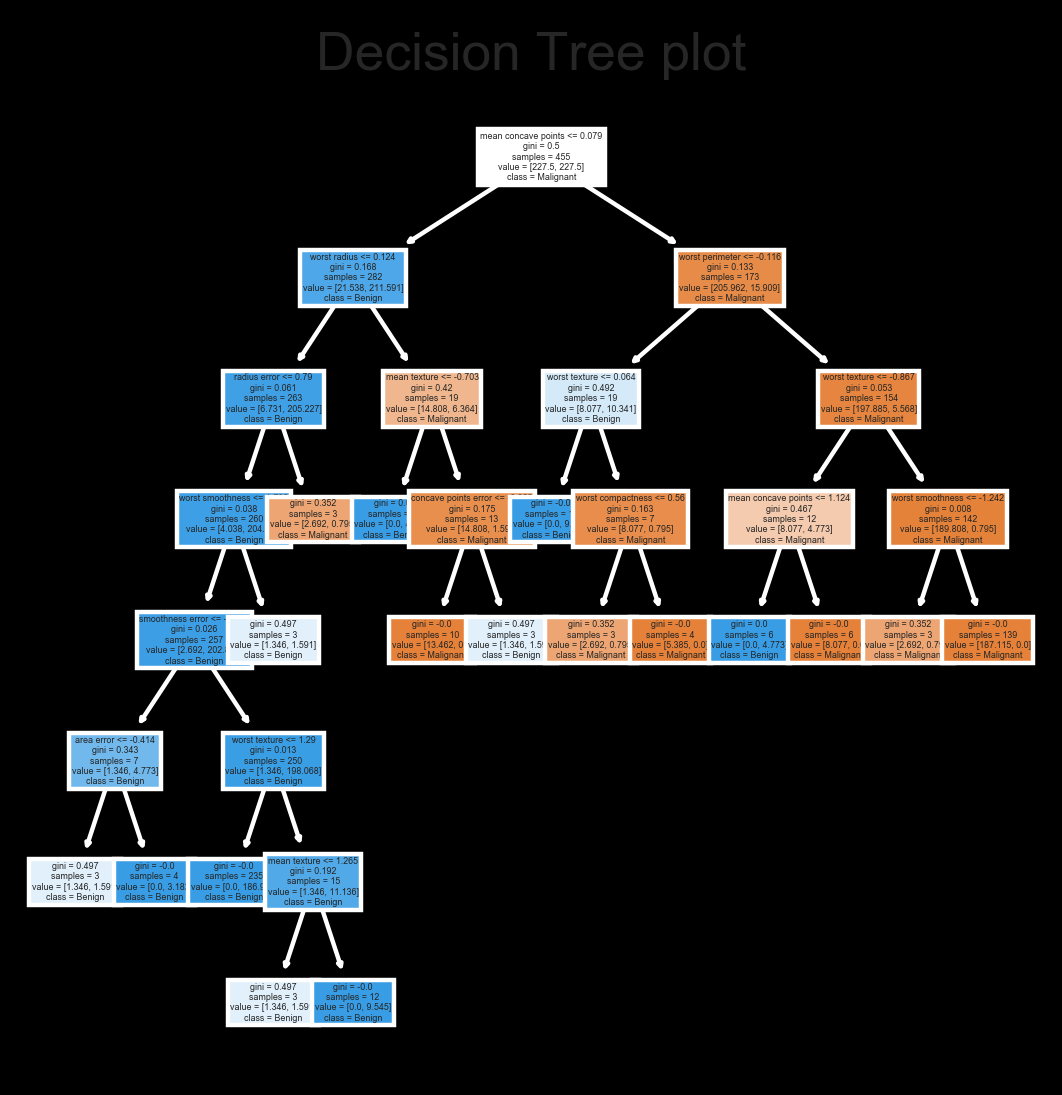

In [236]:
#Display decision tree 

fn = df.columns
cn = ['Malignant','Benign']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=320,facecolor='k')
tree.plot_tree(tree1,filled = True,fontsize=2,class_names=cn,feature_names = fn) 
axes.set_title('Decision Tree plot')
plt.show()

- First node of the tree called the root node and it contains the number of instances of all the classes respectively. Each node presents a test on a particular attribute.Multiple possible outcomes lead to branches of the tree. First node shows that the gini criterion is 0.5 and it is splitting the data first on the basis of mean concave points.Samples with mean concave points less then 0.079 go into the left branch and samples wuth more than 0.079 go into right branch.

- Almost half of the features in the decision tree  match the initial candidate features from Section 1.

- Initially my top five selected features were: worst perimeter,  worst radius, worst concave points, mean concave points, mean concavity.

- And the descision tree's top five candidates are:worst perimeter,mean concave points,worst radius,worst texture ,mean texture.

In [237]:
importances = tree1.feature_importances_

In [238]:
#std = np.std([tree.feature_importances_ for tree in tree.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 7 (0.756328)
2. feature 20 (0.078728)
3. feature 21 (0.051109)
4. feature 22 (0.044202)
5. feature 1 (0.031985)
6. feature 10 (0.017825)
7. feature 24 (0.006901)
8. feature 17 (0.006490)
9. feature 13 (0.002944)
10. feature 14 (0.002477)
11. feature 25 (0.001010)
12. feature 4 (0.000000)
13. feature 5 (0.000000)
14. feature 3 (0.000000)
15. feature 6 (0.000000)
16. feature 8 (0.000000)
17. feature 2 (0.000000)
18. feature 9 (0.000000)
19. feature 29 (0.000000)
20. feature 11 (0.000000)
21. feature 12 (0.000000)
22. feature 28 (0.000000)
23. feature 15 (0.000000)
24. feature 16 (0.000000)
25. feature 18 (0.000000)
26. feature 19 (0.000000)
27. feature 23 (0.000000)
28. feature 26 (0.000000)
29. feature 27 (0.000000)
30. feature 0 (0.000000)


In [239]:
#Top five feature candidates are:
#mean concave points,worst radius,worst texture,worst perimeter,mean texture

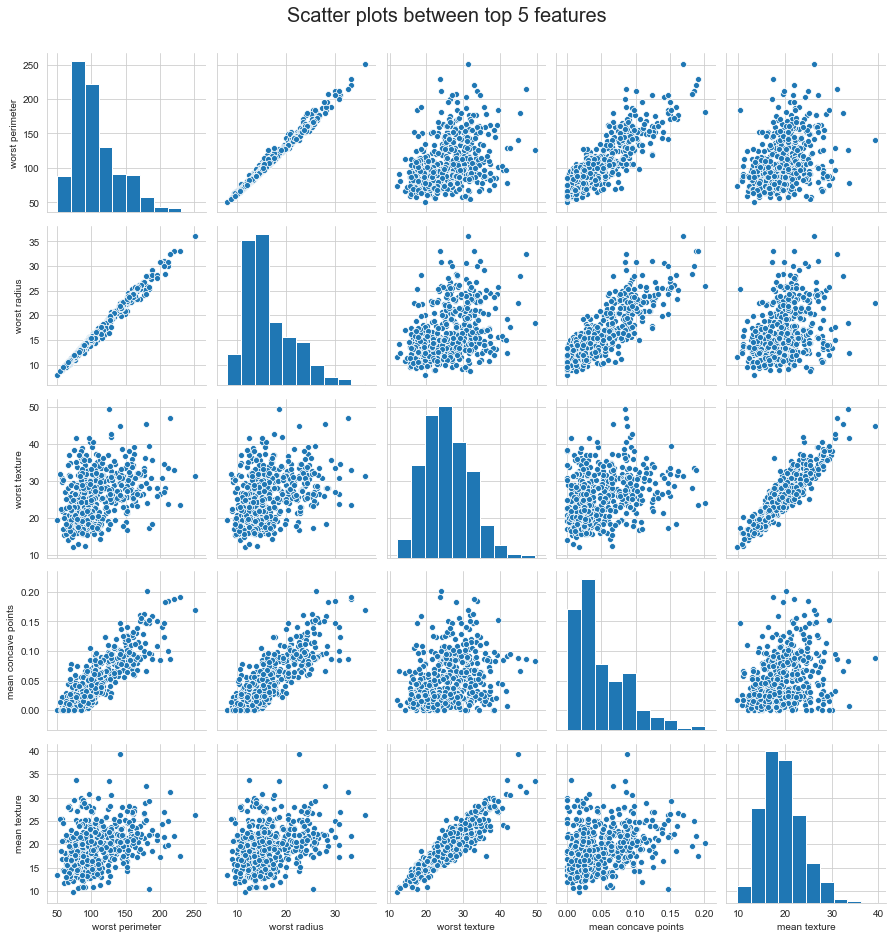

In [240]:
#Scatter plots between top 5 candidate features

rcParams['figure.figsize'] = 5,5
cols = ["worst perimeter","worst radius","worst texture","mean concave points","mean texture"]
sns_plot = sns.pairplot(data=df[cols])

plt.suptitle('Scatter plots between top 5 features', y=1.04, size=20)
plt.tight_layout()
plt.show()

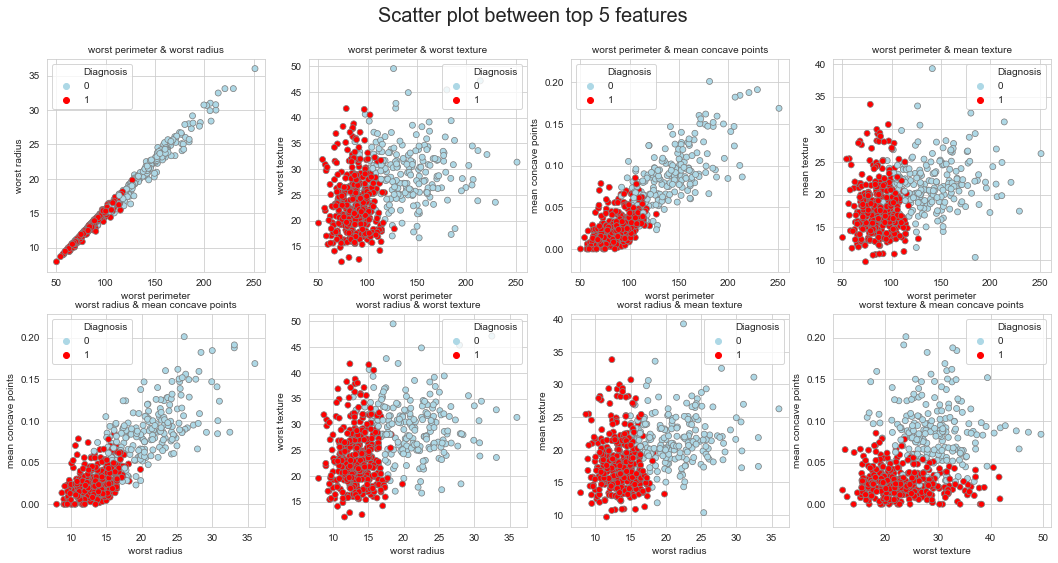

In [241]:
# Scatter plot
fig = plt.figure(figsize=(18,18))

sns.set_style('whitegrid')
sns.color_palette("bright")
palette ={0 : 'lightblue', 1 : 'red'}
edgecolor = 'grey'

def plot_scatter(a,b,k):
    
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "Diagnosis", data = df, palette = palette, edgecolor=edgecolor)
    plt.title(a + ' & ' + b,fontsize=10)
    k+=1
    
plt.suptitle('Scatter plot between top 5 features', y=0.92, size=20)
plot_scatter("worst perimeter","worst radius",441)   
plot_scatter("worst perimeter","worst texture",442)
plot_scatter("worst perimeter","mean concave points",443)
plot_scatter("worst perimeter","mean texture",444)

plot_scatter("worst radius","mean concave points",445)   
plot_scatter("worst radius","worst texture",446)
plot_scatter("worst radius","mean texture",447)
plot_scatter("worst texture","mean concave points",448)

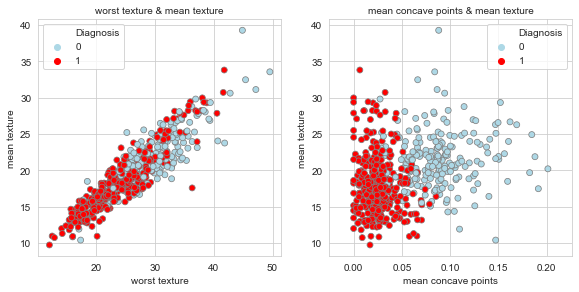

In [242]:
fig = plt.figure(figsize=(20,20))

plot_scatter("worst texture","mean texture",441)
plot_scatter("mean concave points","mean texture",442)

## **----------------------------- 4. Evaluating the Models: SVM-------------------------------**

In [7]:
#Construct a support vector classifier with a radial basis function kernel.

In [249]:
vector_classifier = SVC(kernel='rbf',class_weight='balanced',gamma = 'auto')
vector_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
#tol         - default value e-3 = 0.0498 will be  as the tolerance for stopping criterion of svc
#class_weight- “balanced” mode is used so that the values of y  automatically adjusts weights inversely 
#              proportional to class frequencies in the input data.
#max_iter    - default=-1 is used for no limit within solver for maximum number of iterations

In [250]:
# Build a pipeline

scaler2 = StandardScaler()    # Default range is [0, 1]
 
std_pipeline = Pipeline([('scaler', scaler2)])

#Apply to training data
X_s2 = std_pipeline.fit_transform(X_train)

#Apply to test data
X_test_s2 = std_pipeline.transform(X_test)

- Does data need to be scaled for support vector classification:
Yes data needs to be scaled for support vector classification as this algorithm is not scale invariant. If data is not scaled it can cause overfitting.

- Are the different class sizes a problem:
Yes the different class sizes can create biased results. Since class sizes are different here, i am using parameter class_weight set to balanced.

In [251]:
# grid search
param_grid  = {'C': [1,5,10,20,100],'gamma': [0.001, 0.0001,0.0011], 'kernel': ['rbf']}

clf = GridSearchCV(vector_classifier,param_grid,cv=5)
clf.fit(X_s2,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10, 20, 100],
                         'gamma': [0.001, 0.0001, 0.0011], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [252]:
clf.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [253]:
svmc = SVC(C = 10,gamma = 0.001,kernel='rbf',class_weight='balanced')
svmc.fit(X_s2,y_train)
y2_pred = svmc.predict(X_test_s2)

In [254]:
y2_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])


- C : C is the regularization parameter and it must be strictly positive. It represents misclassification or error term.A low C makes the decision surface smooth, while a high C aims at classifying all training sample correctly. So i chose values of C between 1-100.

- Gamma : Gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting.Gamma defines how much influence a single training sample has. Gamma=0.1 is considered to be a good default value.Therefore I have used values of gamma around 0.1 

In [9]:
#Calculate the confusion matrix, precision and recall of the final classifier

In [255]:
confusion_matrix(y_test, y2_pred)

array([[42,  1],
       [ 1, 70]])

In [256]:
precision_score(y_test, y2_pred, average = None)

array([0.97674419, 0.98591549])

In [257]:
recall_score(y_test, y2_pred, average = None)

array([0.97674419, 0.98591549])

In [258]:
accuracy_score(y_test, y2_pred)

0.9824561403508771

- Strengths-
1.Support vector classifier is memory efficient
2.Effective in high dimensional spaces
3.It is Versatile as different Kernel functions can be specified for the decision function
4.It works really well with a clear margin of separation

- Weaknesses-
1.SVM is not suitable for large datasets because of its high training time and it also takes more time in training 
2.If the number of features is much greater than the number of samples it can cause overfitting
3.Support Vector Machine algorithms are not scale invariant

In [259]:
svmc.support_vectors_

array([[ 0.32910211,  0.75680107,  0.28967589, ...,  0.12899967,
         0.42798088,  0.77697663],
       [ 0.27813844,  0.66528001,  0.22134988, ...,  0.59486965,
        -0.36464082, -0.28818525],
       [ 0.28663239,  2.49335462,  0.19871174, ..., -0.74220784,
         0.51992499, -1.24621394],
       ...,
       [ 1.05675009, -1.397464  ,  0.93506863, ..., -0.47157416,
        -1.77867793, -1.41112052],
       [-0.27679932,  0.36490318, -0.24293775, ...,  0.06003866,
        -0.54218808, -0.11935232],
       [-0.70149659, -0.20065007, -0.68788006, ...,  0.11673994,
        -0.15697394,  0.39836459]])

- A Support Vector Machine  performs classification by finding the hyperplane that maximizes the margin between the two classes. The vectors that define the hyperplane are the support vectors.If the number of input features is 2, then the hyperplane is just a line. Data points that are closest to the hyperplane and influence the position and orientation of the hyperplane are the support vectors as seen in the diagram(the points marked with circles). By using support vectors, we can maximize the margin of the classifier.

## **------------------------------ 5. Comparing the two models -----------------------------------**

In [10]:
# general observations


- Precision score is higher for Support vector classifier when compared to decision tree.


- #SVC-
Shape of the SVM decision boundary depends on the kernel used.Using rbf kernel vector machine, we draw a suitable nonlinear decision boundary. 


- We need to transform our data for SV classifier. Choice of kernel and hyper-parameter tuning is the key to getting good performance from this classifier. In support vector machines, the line that maximizes the margin between the classes is the one chosen as the optimal model. Support Vector Machine algorithms are not scale invariant. 


- #Decision Tree-
Decision treeboundary of a decision tree is determined by overlapping orthogonal half-planes. The decision boundaries made by a decision tree are parallel to the axis. These decision boundaries are drawn iteratively for every decision region and a tree is built.Decision Trees divide the input space into axis-parallel rectangles and label each rectangle with one of the n classes.


- Is considered non-parametric, making no assumption on the distribution of data and the structure of the true model. 
It require less data cleaning and are not influenced by outliers. Decision trees can, unlike linear models, fit linearly inseparable datasets. An inseparable dataset is one where data points of different classes cannot be separated by a single line


- #towards the edges of the scatterplot(extrapolation)-
Trees don’t handle new data well that is out of the range of the original training data.Therefore extrapolation is not handled well with decision tree classifier. It provides us with Average results as it is not able to Extrapolate and understand the increasing or decreasing trend in data.Whereas support vector machine performs well with extrapolation compared to decision tree.

In [11]:
# sources of bias in the two classifiers

 
- #Support vector classifier-
When C is small, the classifier is okay with misclassified data points i.e.high bias and low variance. When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points i.e.low bias and high variance. When gamma has a low value, the decision boundary curve is very low and thus the decision region is very broad. When gamma has a high, the ‘ decision boundary curve is high, which creates many decision-boundaries around data points. Chossing appropriate values of C and gamma has hepled to avoid overfitting of data.


- #Decision tree-
Choosing a low value of max depth can cause underfitting ie. low variance and choosing a high value of max depth can cause overftting ie. high variance of the data.A very small min number of leaves will usually mean the tree will overfit(high variance), whereas a large number will prevent the tree from learning the data(low variance).Choosing a depth of 7 and min number of leaves as 3 has hepled me avoid overfitting of data.

In [ ]:
# final accuracy


I selected top 5 features as: Mean concave points, Mean texture, Worst radius, Worst texture and Worst perimeter.
My highest Accuracy - 95.61%